# Modeling and Simulation in Python

Starter code for the orbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)

mads young

In [89]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth orbiting the sun

In [90]:
# Here are the units we'll need
year = UNITS.year
s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
AU = UNITS.astronomical_unit

<Unit('astronomical_unit')>

In [91]:
x_0 = 0 * m
y_0 = 149597870691.0*m #1.47e11 * m

vx_0 = 30300 * m / s
vy_0 = 0 * m / s

init = State(x=x_0,
             y=y_0,
             vx=vx_0,
             vy=vy_0)

,values
x,0 meter
y,149597870691.0 meter
vx,30300.0 meter / second
vy,0.0 meter / second


In [92]:
# Making a system object

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m_sun=1.99e30 * kg,
                m_earth=5.972e24 * kg,
                r_final= 695.508e6 * m + 6.371e6 * m,
                t_end=3.3450342e7 * s)

,values
init,x 0 meter y 149597870...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m_sun,1.99e+30 kilogram
m_earth,5.972e+24 kilogram
r_final,701879000.0 meter
t_end,33450342.0 second


In [93]:
# Here's a function that computes the force of gravity
# IMPORTANT: direction first because it is a vector
# and we want to return force as a vector

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    
    position = Vector(x, y)
    
    mag = G * m_sun * m_earth / (position.mag ** 2)
    direction = -position.hat()
    
    force = direction * mag
    return force

In [94]:
universal_gravitation(init, system)

<Quantity([-0.00000000e+00 -3.54411866e+22], 'newton')>

In [95]:
# The slope function

def slope_func(state, t, system):
    
    x, y, vx, vy = state
    unpack(system)    

    v = Vector(vx, vy)
    force = universal_gravitation(state, system)
    a = force / m_earth
    
    return vx, vy, a.x, a.y

In [96]:
vx, vy, ax, ay = slope_func(init, 0, system)
print(vx, vy, ax, ay)

30300.0 meter / second 0.0 meter / second -0.0 newton / kilogram -0.005934559038759181 newton / kilogram


In [97]:
# Here's an event function that stops the simulation
# before the collision

def event_func(state, t, system):
    x, y, vx, vy = state
    position = Vector(x, y)
    return position.mag - system.r_final

In [98]:
# Always test the event function!

event_func(init, 0, system)

<Quantity(148895991691.0, 'meter')>

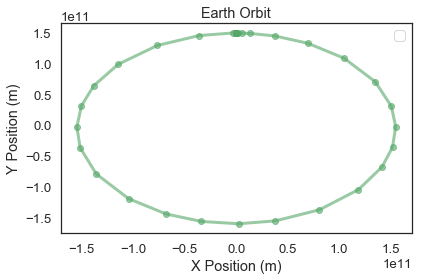

In [99]:
results, details = run_ode_solver(system, slope_func,events=event_func, method='RK23') #Changed LSODA to RK23
results.index /= 60 * 60 * 24
plot(results.x, results.y, 'go-')
decorate(title='Earth Orbit',
         xlabel='X Position (m)',
         ylabel='Y Position (m)')

In [100]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(387.1567361111111, 'second')>

In [101]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(0.004480980742026748, 'day')>

In [102]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(0, t_final, 201)
results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)

In [103]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [109]:
# Scaling the distance to million km

r = results.x / 1e9;

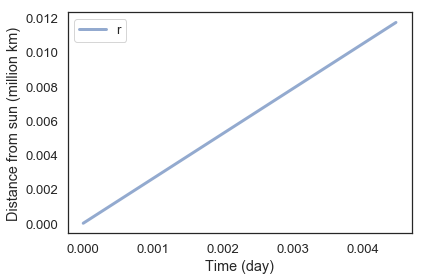

In [110]:
# And plotting

plot(r, label='r')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

In [106]:
results

,x,y,vx,vy
0.000000,0.000000e+00,1.495979e+11,30300.000000,0.000000
0.000022,5.865425e+04,1.495979e+11,30300.000000,-0.011488
0.000045,1.173085e+05,1.495979e+11,30300.000000,-0.022976
0.000067,1.759627e+05,1.495979e+11,30300.000000,-0.034464
0.000090,2.346170e+05,1.495979e+11,30300.000000,-0.045952
0.000112,2.932712e+05,1.495979e+11,30300.000000,-0.057440
0.000134,3.519255e+05,1.495979e+11,30300.000000,-0.068928
0.000157,4.105797e+05,1.495979e+11,30300.000000,-0.080416
0.000179,4.692340e+05,1.495979e+11,30300.000000,-0.091904
0.000202,5.278882e+05,1.495979e+11,30300.000000,-0.103392
